In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Advertising.csv")

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = df.drop('sales',axis=1)

In [10]:
y=df['sales']

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [16]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [18]:
poly_features= polynomial_converter.transform(X)

In [20]:
polynomial_converter.transform(X).shape

(200, 9)

In [22]:
poly_features.shape

(200, 9)

In [24]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [26]:
poly_features[0] ## this will give the answer (x1,x2,x3,x1^2,x2^2,x3^2,x1 x2,x2 x3,x1 x3)

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [28]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [55]:
test_predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [59]:
MAE =mean_absolute_error(y_test,test_predictions)

In [61]:
MSE =mean_squared_error(y_test,test_predictions)

In [63]:
RMSE = np.sqrt(MSE)

In [65]:
MAE

0.4896798044803721

In [67]:
MSE

0.4417505510403673

In [69]:
RMSE

0.6646431757269214

In [75]:
# Previous VAlue of MAE and RMSE are 1.213 and 1.526 respectively by using simple linear regression therefore polynomial regression is much better than the Simple linear regression

In [77]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [81]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [83]:
69.2**2

4788.64

# choosing Degree of Polynomial(optimal Model complexity)

In [87]:
# create the different order
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train and test
#plot the results (error vs poly order)

In [91]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):

    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model= LinearRegression()

    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [93]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

In [95]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269214,
 0.5803286825217238,
 0.5077742623175882,
 2.575837063490081,
 4.214027384734879,
 1374.9574048884183,
 4344.727850519797,
 93796.02671838581]

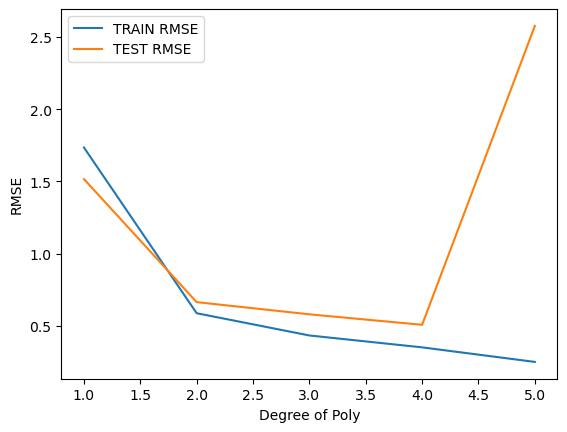

In [121]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

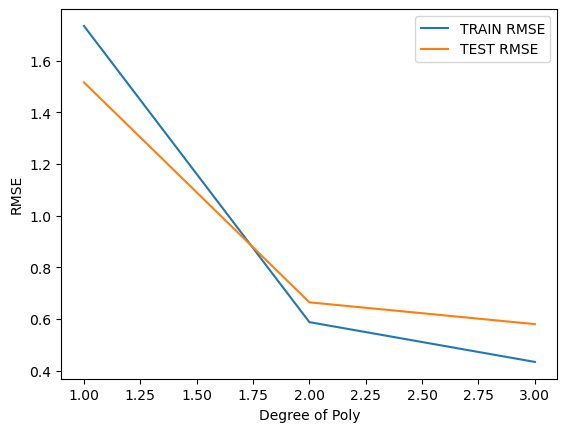

In [123]:
plt.plot(range(1,4),train_rmse_errors[:3],label='TRAIN RMSE')
plt.plot(range(1,4),test_rmse_errors[:3],label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [125]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias = False)

In [127]:
final_model = LinearRegression()

In [129]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [131]:
from joblib import dump,load

In [133]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [135]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [137]:
loaded_converter = load('final_converter.joblib')

In [139]:
loaded_model = load('final_poly_model.joblib')

In [141]:
campaign =[[149,22,12]]

In [143]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [145]:
transformed_data = loaded_converter.fit_transform(campaign)

In [149]:
loaded_model.predict(transformed_data)

array([14.64501014])